<a href="https://colab.research.google.com/github/Alexsey111/AB_test_analysis/blob/main/AB_test_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дизайн эксперимента для A/B-теста размещения рекламного блока:

Цель эксперимента:

Проверить, влияет ли перемещение первого рекламного блока из ленты товаров в верхнюю часть страницы на ключевые бизнес-метрики, включая конверсию в заказ (CR) и выручку на пользователя (ARPU).

Гипотезы:

Нулевая гипотеза (H₀):

Перемещение рекламного блока в верхнюю часть интерфейса не оказывает статистически значимого влияния на ключевые бизнес-метрики:

Конверсия в заказ (CR)
Выручка на пользователя (ARPU)
Выручка на покупателя (ARPPU)

Альтернативная гипотеза (H₁):

Перемещение рекламного блока в верхнюю часть интерфейса приводит к статистически значимому улучшению ключевых бизнес-метрик:

Конверсия в заказ (CR)
Выручка на пользователя (ARPU)
Выручка на покупателя (ARPPU)

Метрики для анализа:

Ключевая метрика:

Конверсия в заказ (CR) — процент пользователей, совершивших покупку после взаимодействия с рекламным блоком.

Второстепенные метрики:

Выручка на пользователя (ARPU)
Выручка на покупателя (ARPPU)
Конверсия в добавление товаров в корзину
Кликабельность секции рекламы (CTR)

План эксперимента:

Длительность:

1 неделя (основано на предыдущих экспериментах и временных ограничениях).

Разделение на группы:

Контрольная группа (A): Рекламный блок остаётся на текущем месте (после трёх линий товаров).

Тестовая группа (B): Рекламный блок перемещается в верхнюю часть страницы (над основной лентой товаров).

Рандомизация:

Пользователи случайным образом распределяются между группами с равной вероятностью (50/50).
Рандомизация проводится на уровне пользователя, чтобы исключить перекрёстное влияние.

Размер выборки:

Размер выборки определяется с учётом:

Желаемого минимального детектируемого эффекта (MDE) = 2.5% для CR.

Мощности теста = 80%.

Уровня статистической значимости (α) = 0.05.

Сбор данных:

Данные собираются на уровне пользователей и агрегируются по группам.
Включают все указанные метрики.

Методы статистического анализа:

Т-тест для независимых выборок: Для сравнения средних значений ключевых метрик между группами.

Z-тест: Для проверки пропорций (если применимо).

Тест Шапиро-Уилка: Проверка нормальности распределения данных.

Тест Левена: Проверка гомогенности дисперсий.

Уровень значимости (α): 0.05

Порог MDE: 2.5% для ключевой метрики CR.

Условия успешного теста:

Конверсия в заказ (CR) показывает статистически значимый рост на 2.5% и более.
Второстепенные метрики (ARPU, ARPPU) демонстрируют положительные изменения.
Результаты подтверждаются статистическими тестами с уровнем значимости α = 0.05.

Ограничения и допущения:

Временные ограничения: Одна неделя из-за предстоящих изменений в каталоге.

Внешние факторы: Сезонность, рекламные кампании и другие воздействия могут повлиять на результаты.

Поведение пользователей: Предполагается, что поведение пользователей остаётся стабильным на протяжении эксперимента.

Анализ результатов:

Сравнение ключевых и второстепенных метрик между контрольной и тестовой группами.

Проверка статистической значимости различий (p-value < 0.05).

Визуализация данных для наглядного представления различий (гистограммы, коробчатые диаграммы, линейные графики).

Оценка чувствительности (Sensitivity Analysis) для проверки устойчивости результатов.

Принятие решения:

Если конверсия в заказ (CR) и второстепенные метрики (ARPU, ARPPU) показали статистически значимые улучшения, эксперимент считается успешным, и новое размещение рекламного блока может быть внедрено на постоянной основе.
Если значимого улучшения не зафиксировано, текущее положение рекламного блока сохраняется.


In [ ]:
# Устанавливаем gdown для скачивания файлов
!pip install gdown

In [ ]:
from google.colab import drive
import gdown
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import levene

In [ ]:
# Подключаем Google Диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ссылка на файл
file_id = '1bf4EePy7jur674ESshKh9TbcH25ruicG'
url = f'https://drive.google.com/uc?id={file_id}'

# Скачиваем файл
output = 'data_raw.csv'
gdown.download(url, output, quiet=False)

# Загружаем CSV в DataFrame
df = pd.read_csv(output)
print(df.head())

# Ссылка на файл, включающая ID
url = 'https://drive.google.com/uc?id=1xEHGMdjCM8vl0CQoXxZW51k4187_Zhyc'

# Загрузка файла
gdown.download(url, 'final_results_to_analyze.xlsx', quiet=False)

# Загрузка данных
final_results = pd.read_excel('/content/final_results_to_analyze.xlsx')  # Результаты A/B теста
print(final_results.head())

Downloading...
From (original): https://drive.google.com/uc?id=1bf4EePy7jur674ESshKh9TbcH25ruicG
From (redirected): https://drive.google.com/uc?id=1bf4EePy7jur674ESshKh9TbcH25ruicG&confirm=t&uuid=a2ee6f21-0e73-4bfe-8700-7309fcb1b667
To: /content/data_raw.csv
100%|██████████| 968M/968M [00:14<00:00, 66.6MB/s]


   Unnamed: 0  client_id          dt event_type
0           0    6095092  2024-06-20     clicks
1           1  541138559  2024-06-18     clicks
2           2   12189072  2024-06-20     clicks
3           3  674385020  2024-06-20     clicks
4           4  726939378  2024-06-20     clicks


Downloading...
From (original): https://drive.google.com/uc?id=1xEHGMdjCM8vl0CQoXxZW51k4187_Zhyc
From (redirected): https://drive.google.com/uc?id=1xEHGMdjCM8vl0CQoXxZW51k4187_Zhyc&confirm=t&uuid=e53ee53a-4f4d-4847-9d37-e79f4c68d5a1
To: /content/final_results_to_analyze.xlsx
100%|██████████| 44.7M/44.7M [00:00<00:00, 47.4MB/s]


        date  client_id ab_group  is_view_ads  cnt_view_ads  is_adds_ads  \
0 2024-07-26    8881380     test            0             0            0   
1 2024-07-28  850950385     test            0             0            0   
2 2024-07-25      50885  control            0             0            0   
3 2024-07-26     601239  control            0             0            0   
4 2024-07-28  694655866  control            0             0            0   

   cnt_adds_ads  sum_adds_ads  is_orders_ads  cnt_orders_ads  sum_orders_ads  
0             0             0              0               0               0  
1             0             0              0               0               0  
2             0             0              0               0               0  
3             0             0              0               0               0  
4             0             0              0               0               0  


Всего пользователей, которые видели экран (views): 3102735
Всего пользователей, которые кликали (clicks): 228491
Всего пользователей, которые добавляли товары (adds): 90438

Конверсия views → clicks: 7.36%
Конверсия clicks → adds: 39.58%
Общая конверсия (views → adds): 2.91%



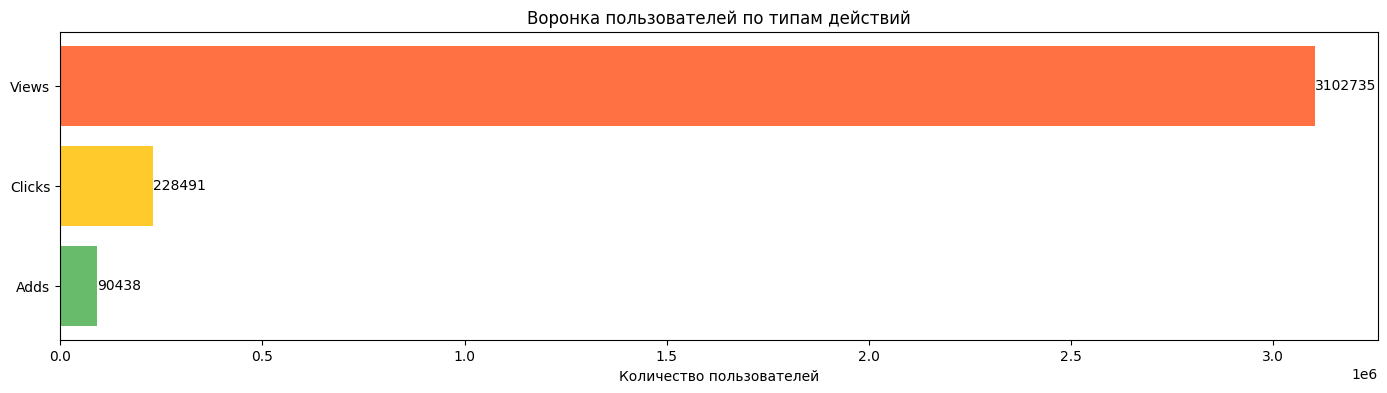


Дисперсия для отношения Clicks → Adds: 332.0900
Дисперсия для отношения Views → Adds: 169109.0933
Дисперсия для отношения Views → Clicks: 10693.2818


In [35]:
# Преобразуем столбец dt в datetime
df['dt'] = pd.to_datetime(df['dt'])

# Группируем по 'client_id' и 'dt', исключаем дублирующие события
df_unique = df.groupby(['client_id', 'dt'])['event_type'].agg(lambda x: ','.join(set(x))).reset_index()

# Создаем бинарные колонки
df_unique['views'] = df_unique['event_type'].apply(lambda x: 1 if 'views' in x else 0)
df_unique['clicks'] = df_unique['event_type'].apply(lambda x: 1 if 'clicks' in x else 0)
df_unique['adds'] = df_unique['event_type'].apply(lambda x: 1 if 'adds' in x else 0)

# Финальный датафрейм
df_funnel = df_unique[['client_id', 'dt', 'views', 'clicks', 'adds']]

# Конверсии
views_users = df_funnel[df_funnel['views'] == 1]['client_id'].nunique()
clicks_users = df_funnel[df_funnel['clicks'] == 1]['client_id'].nunique()
adds_users = df_funnel[df_funnel['adds'] == 1]['client_id'].nunique()

conversion_views_to_clicks = (clicks_users / views_users) * 100 if views_users != 0 else 0
conversion_clicks_to_adds = (adds_users / clicks_users) * 100 if clicks_users != 0 else 0
overall_conversion = (adds_users / views_users) * 100 if views_users != 0 else 0

print(f"Всего пользователей, которые видели экран (views): {views_users}")
print(f"Всего пользователей, которые кликали (clicks): {clicks_users}")
print(f"Всего пользователей, которые добавляли товары (adds): {adds_users}")
print()
print(f"Конверсия views → clicks: {conversion_views_to_clicks:.2f}%")
print(f"Конверсия clicks → adds: {conversion_clicks_to_adds:.2f}%")
print(f"Общая конверсия (views → adds): {overall_conversion:.2f}%")
print()

# Воронка
stages = ['Adds', 'Clicks', 'Views']
values = [adds_users, clicks_users, views_users]

plt.figure(figsize=(17, 4))
plt.barh(stages, values, color=['#4CAF50', '#FFC107', '#FF5722'], alpha=0.85)
plt.xlabel('Количество пользователей')
plt.title('Воронка пользователей по типам действий')

for i, v in enumerate(values):
    plt.text(v + 100, i, str(v), va='center')

plt.show()

# Функция для расчета дисперсии
def var_ratio(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    cov_xy = np.cov(x, y, ddof=1)[0, 1]

    return (var_x / mean_y**2) + (var_y * mean_x**2 / mean_y**4) - (2 * mean_x * cov_xy / mean_y**3)

# Расчет дисперсий
dispersia_clicks_to_adds = var_ratio(df_unique['clicks'], df_unique['adds'])
dispersia_views_to_adds = var_ratio(df_unique['views'], df_unique['adds'])
dispersia_views_to_clicks = var_ratio(df_unique['views'], df_unique['clicks'])

print()
print(f"Дисперсия для отношения Clicks → Adds: {dispersia_clicks_to_adds:.4f}")
print(f"Дисперсия для отношения Views → Adds: {dispersia_views_to_adds:.4f}")
print(f"Дисперсия для отношения Views → Clicks: {dispersia_views_to_clicks:.4f}")


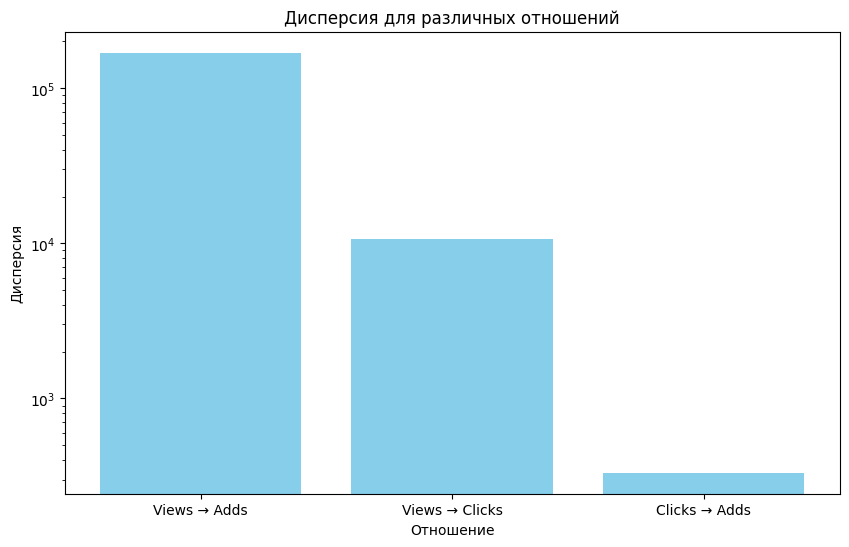

In [ ]:
# Данные для дисперсий
ratios = ['Views → Adds', 'Views → Clicks', 'Clicks → Adds']
dispersions = [169109.0933, 10693.2818, 332.0900]  # Дисперсии, которые мы получили

# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(ratios, dispersions, color='skyblue')

# Добавление подписей
plt.xlabel('Отношение')
plt.ylabel('Дисперсия')
plt.title('Дисперсия для различных отношений')
plt.yscale('log')  # Используем логарифмическую шкалу, так как значения могут сильно различаться
plt.show()


Анализ данных:

Всего пользователей: 3,102,736 — общее количество уникальных пользователей.

Пользователей, которые видели экран (views): 3,102,735 — почти все пользователи заходили на главный экран.

Пользователей, которые кликали (clicks): 228,491 — 7.36% от тех, кто видел экран.

Пользователей, которые добавляли товары (adds): 90,438 — 39.58% от тех, кто кликал.

Общая конверсия: 2.91% — процент пользователей, которые дошли до добавления товаров от общего количества просмотров экрана.

Выводы по данным:

Этап views → clicks (7.36%)

Только небольшой процент пользователей, которые видели экран, взаимодействуют с рекламой.
Возможная причина: недостаточная привлекательность рекламы или неудобный интерфейс.

Этап clicks → adds (39.58%)

Почти 40% пользователей, которые кликнули на рекламу, добавляют товары.
Это хороший показатель, что реклама ведёт на релевантные продукты.

Общая конверсия (2.91%)

Из всех пользователей, которые видели экран, до добавления товаров доходит менее 3%.
Это говорит о большом "оттоке" пользователей на первом этапе воронки.

Рекомендации для улучшения воронки:

Оптимизация первого шага (views → clicks):

Улучшить баннеры и рекламные сообщения.

Добавить более заметные CTA (call-to-action).

Провести A/B тестирование различных вариантов главного экрана.

Анализ поведения на этапе clicks → adds:

Проанализировать, какие товары чаще всего добавляют в корзину.

Улучшить качество целевой рекламы.

Дополнительный анализ данных:

Разбить пользователей на когорты по дате и анализировать динамику.
Проанализировать, есть ли разница в поведении пользователей по разным сегментам (например, новые пользователи против постоянных).


Дисперсия для отношения Clicks → Adds: 332.0900
Это значение говорит о том, насколько сильно варьируется отношение количества кликов к количеству добавлений товаров среди пользователей. 332.0900 — это достаточно высокая дисперсия, что может свидетельствовать о значительном разбросе в том, как клики (clicks) влияют на добавления (adds).

Дисперсия для отношения Views → Adds: 169109.0933
Это значение дисперсии очень высокое и значительно выше, чем для отношений Clicks → Adds и Views → Clicks. Оно указывает на огромный разброс в том, как просмотры (views) влияют на добавления товаров (adds).

Дисперсия для отношения Views → Clicks: 10693.2818
10693.2818 — это также достаточно высокая дисперсия, но она ниже, чем для Views → Adds. Это может означать, что просмотры экрана (views) имеют более стабильное влияние на клики (clicks), чем на добавления товаров.

In [23]:
# Базовая конверсия из предыдущих шагов:
baseline_conversion = overall_conversion / 100  # Базовая конверсия (0.0291)
mde = 0.025  # Минимальный ожидаемый эффект (2.5%)
alpha = 0.05  # Уровень значимости (5%)
power = 0.8  # Статистическая мощность (80%)

# Расчет размера выборки
analysis = NormalIndPower()
sample_size = analysis.solve_power(
    effect_size=(mde / math.sqrt(baseline_conversion * (1 - baseline_conversion))),
    power=power,
    alpha=alpha,
    ratio=1
)

# Таблица MDE и размера выборки
sample_size_per_group = math.ceil(sample_size)  # Округляем вверх, так как не можем взять дробные пользователи
total_sample_size = sample_size_per_group * 2  # Для теста и контроля

# Создаем таблицу с результатами
sample_data = {
    'MDE (%)': [mde * 100],
    'Размер выборки на группу': [sample_size_per_group],
    'Общий размер выборки (тест и контроль)': [total_sample_size]
}

sample_df = pd.DataFrame(sample_data)
print(sample_df)


   MDE (%)  Размер выборки на группу  Общий размер выборки (тест и контроль)
0      2.5                       711                                    1422


Пропуски в данных:
date              0
client_id         0
ab_group          0
is_view_ads       0
cnt_view_ads      0
is_adds_ads       0
cnt_adds_ads      0
sum_adds_ads      0
is_orders_ads     0
cnt_orders_ads    0
sum_orders_ads    0
dtype: int64 

Конверсия в добавление (control): 0.28
Конверсия в добавление (test): 0.27
Конверсия в заказы (control): 0.24
Конверсия в заказы (test): 0.24
ARPU (control): 7.92
ARPU (test): 8.42
ARPPU (control): 321.78
ARPPU (test): 337.92
Средний чек (control): 284.98
Средний чек (test): 287.01
Среднее кол-во заказов на пользователя (control): 0.03
Среднее кол-во заказов на пользователя (test): 0.03

p-value для конверсии в добавление: 0.9942
p-value для конверсии в заказы: 0.5268



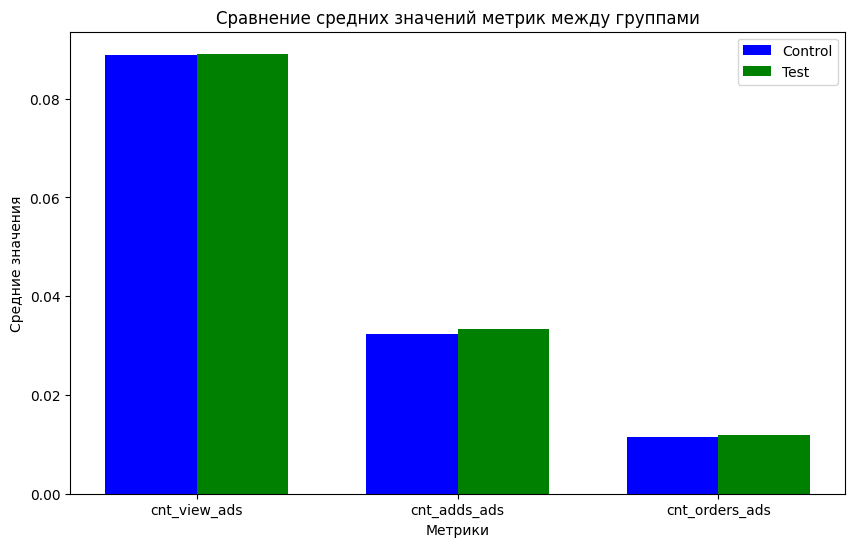

In [27]:
# Обработка пропусков
missing_data = final_results.isnull().sum()
print("Пропуски в данных:")
print(missing_data,'\n')

# Основные метрики
# Конверсия в добавление товаров из рекламы
control_group = final_results[final_results['ab_group'] == 'control']
test_group = final_results[final_results['ab_group'] == 'test']

def calculate_conversion(group, numerator, denominator):
    return group[numerator].sum() / group[denominator].sum() if group[denominator].sum() > 0 else 0

conversion_adds_control = calculate_conversion(control_group, 'is_adds_ads', 'is_view_ads')
conversion_adds_test = calculate_conversion(test_group, 'is_adds_ads', 'is_view_ads')

# Конверсия в заказы
conversion_orders_control = calculate_conversion(control_group, 'is_orders_ads', 'is_view_ads')
conversion_orders_test = calculate_conversion(test_group, 'is_orders_ads', 'is_view_ads')

# Выручка на пользователя (ARPU)
arpu_control = control_group['sum_orders_ads'].sum() / control_group['client_id'].nunique()
arpu_test = test_group['sum_orders_ads'].sum() / test_group['client_id'].nunique()

# Выручка на покупателя (ARPPU)
def calculate_arppu(group):
    buyers = group[group['is_orders_ads'] == 1]['client_id'].nunique()
    return group['sum_orders_ads'].sum() / buyers if buyers > 0 else 0

arppu_control = calculate_arppu(control_group)
arppu_test = calculate_arppu(test_group)

# Средний чек
avg_check_control = control_group['sum_orders_ads'].sum() / control_group['cnt_orders_ads'].sum()
avg_check_test = test_group['sum_orders_ads'].sum() / test_group['cnt_orders_ads'].sum()

# Среднее количество заказов на пользователя
avg_orders_control = control_group['cnt_orders_ads'].sum() / control_group['client_id'].nunique()
avg_orders_test = test_group['cnt_orders_ads'].sum() / test_group['client_id'].nunique()

# Вывод результатов
results = {
    'Конверсия в добавление (control)': conversion_adds_control,
    'Конверсия в добавление (test)': conversion_adds_test,
    'Конверсия в заказы (control)': conversion_orders_control,
    'Конверсия в заказы (test)': conversion_orders_test,
    'ARPU (control)': arpu_control,
    'ARPU (test)': arpu_test,
    'ARPPU (control)': arppu_control,
    'ARPPU (test)': arppu_test,
    'Средний чек (control)': avg_check_control,
    'Средний чек (test)': avg_check_test,
    'Среднее кол-во заказов на пользователя (control)': avg_orders_control,
    'Среднее кол-во заказов на пользователя (test)': avg_orders_test
}

for metric, value in results.items():
    print(f"{metric}: {value:.2f}")

# Статистические тесты
# Тест на конверсию в добавление
add_pvalue = ttest_ind(control_group['is_adds_ads'], test_group['is_adds_ads'], equal_var=False).pvalue

# Тест на конверсию в заказы
order_pvalue = ttest_ind(control_group['is_orders_ads'], test_group['is_orders_ads'], equal_var=False).pvalue

print()

# Вывод p-value
print(f"p-value для конверсии в добавление: {add_pvalue:.4f}")
print(f"p-value для конверсии в заказы: {order_pvalue:.4f}")
print()

# Визуализация
metrics = ['cnt_view_ads', 'cnt_adds_ads', 'cnt_orders_ads']
control_means = control_group[metrics].mean()
test_means = test_group[metrics].mean()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, control_means, bar_width, label='Control', color='blue')
plt.bar(index + bar_width, test_means, bar_width, label='Test', color='green')

plt.xlabel('Метрики')
plt.ylabel('Средние значения')
plt.title('Сравнение средних значений метрик между группами')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.show()


Основные метрики:

Конверсия в добавление товаров (control и test):

Конверсия в добавление товаров в тестовой группе (0.27) немного ниже, чем в контрольной (0.28), но разница незначительная.

Конверсия в заказы (control и test):

Конверсия в заказы также одинакова для обеих групп (0.24), что говорит о том, что поведение пользователей в тестовой и контрольной группах по этому показателю не различается.

ARPU (Average Revenue Per User):

В тестовой группе ARPU выше (8.42 против 7.92 в контрольной), что может указывать на более высокую выручку с пользователя в тесте, но нужно проверить статистическую значимость этой разницы.

ARPPU (Average Revenue Per Paying User):

ARPPU в тестовой группе выше (337.92 против 321.78), что также предполагает, что пользователи, совершившие покупки, генерируют чуть больше выручки в тестовой группе.

Средний чек:

Средний чек немного выше в тестовой группе (287.01 против 284.98), но разница минимальна.

Среднее количество заказов на пользователя:

Показатель одинаков в обеих группах (0.03), что указывает на отсутствие различий в поведении пользователей по частоте покупок.

Статистические тесты (p-value)

p-value для конверсии в добавление:

Значение p-value для теста на конверсию в добавление товаров равно 0.9942. Это указывает на то, что разница в конверсии между контрольной и тестовой группой не является статистически значимой. Обычно p-value выше 0.05 считается недостаточно значимым.

p-value для конверсии в заказы:

Значение p-value для теста на конверсию в заказы равно 0.5268, что также подтверждает отсутствие статистически значимой разницы между группами.

Выводы:

По меткам: Различия между контрольной и тестовой группами по большинству метрик незначительны.

p-value: Результаты тестов (p-value > 0.05) подтверждают, что нет статистически значимой разницы между группами.


In [36]:
# Проверка нормальности для метрик
metrics = ['is_adds_ads', 'is_orders_ads', 'sum_orders_ads', 'cnt_orders_ads', 'sum_adds_ads', 'cnt_adds_ads']
normality_results = {}

for metric in metrics:
    stat, p_value = shapiro(final_results[metric].dropna())
    normality_results[metric] = p_value

# Вывод p-value для нормальности данных
print("P-value для проверки нормальности (Шапиро-Уилка):")
for metric, p_value in normality_results.items():
    print(f"{metric}: {p_value:.4f}")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 981510.
  res = hypotest_fun_out(*samples, **kwds)


P-value для проверки нормальности (Шапиро-Уилка):
is_adds_ads: 0.0000
is_orders_ads: 0.0000
sum_orders_ads: 0.0000
cnt_orders_ads: 0.0000
sum_adds_ads: 0.0000
cnt_adds_ads: 0.0000


In [37]:
# Проверка гомогенности дисперсий между контрольной и тестовой группами
levene_results = {}

for metric in metrics:
    control_data = control_group[metric].dropna()
    test_data = test_group[metric].dropna()
    stat, p_value = levene(control_data, test_data)
    levene_results[metric] = p_value

# Вывод p-value для теста Левена
print("\nP-value для проверки гомогенности дисперсий (Тест Левена):")
for metric, p_value in levene_results.items():
    print(f"{metric}: {p_value:.4f}")



P-value для проверки гомогенности дисперсий (Тест Левена):
is_adds_ads: 0.9942
is_orders_ads: 0.5268
sum_orders_ads: 0.0428
cnt_orders_ads: 0.0406
sum_adds_ads: 0.3321
cnt_adds_ads: 0.1674


In [30]:
# Применение коррекции Бонферрони
alpha = 0.05
num_tests = len(metrics)
bonferroni_alpha = alpha / num_tests

# Вывод результата корректировки
print("\nИспользованный порог значимости с учетом множества тестов (Бонферрони):")
print(f"Корректированный уровень значимости: {bonferroni_alpha:.4f}")



Использованный порог значимости с учетом множества тестов (Бонферрони):
Корректированный уровень значимости: 0.0083


In [31]:
# Тест для ARPU
arpu_control = control_group['sum_orders_ads'].sum() / control_group['client_id'].nunique()
arpu_test = test_group['sum_orders_ads'].sum() / test_group['client_id'].nunique()
t_stat_arpu, p_value_arpu = ttest_ind(control_group['sum_orders_ads'], test_group['sum_orders_ads'], equal_var=False)

# Тест для ARPPU
arppu_control = control_group[control_group['is_orders_ads'] == 1]['sum_orders_ads'].sum() / control_group[control_group['is_orders_ads'] == 1]['client_id'].nunique()
arppu_test = test_group[test_group['is_orders_ads'] == 1]['sum_orders_ads'].sum() / test_group[test_group['is_orders_ads'] == 1]['client_id'].nunique()
t_stat_arppu, p_value_arppu = ttest_ind(control_group[control_group['is_orders_ads'] == 1]['sum_orders_ads'],
                                         test_group[test_group['is_orders_ads'] == 1]['sum_orders_ads'], equal_var=False)

# Вывод результатов
print("\nРезультаты t-теста для ARPU и ARPPU:")
print(f"ARPU - t-статистика: {t_stat_arpu:.4f}, p-value: {p_value_arpu:.4f}")
print(f"ARPPU - t-статистика: {t_stat_arppu:.4f}, p-value: {p_value_arppu:.4f}")



Результаты t-теста для ARPU и ARPPU:
ARPU - t-статистика: -2.0259, p-value: 0.0428
ARPPU - t-статистика: -2.1221, p-value: 0.0338


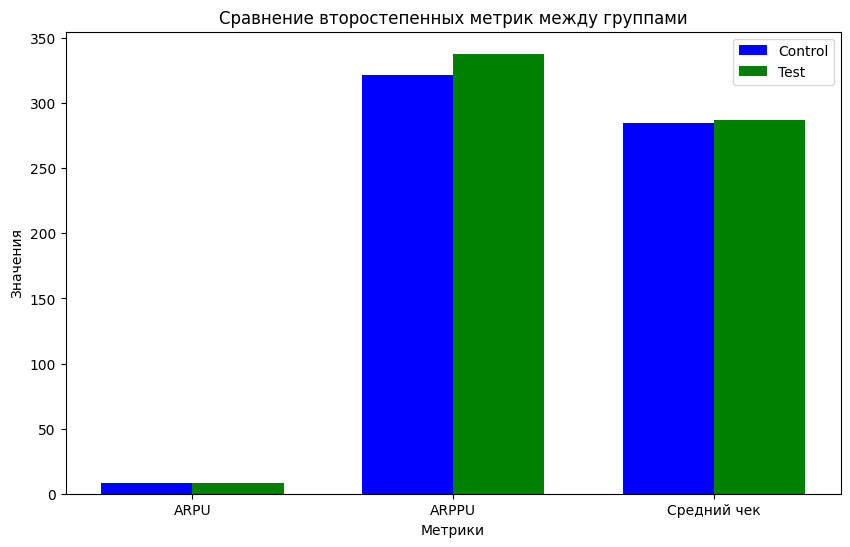

In [32]:
# Визуализация для ARPU, ARPPU и среднего чека
metrics_to_plot = ['ARPU', 'ARPPU', 'Средний чек']

# Собираем данные для визуализации
plot_data = {
    'Control': [arpu_control, arppu_control, avg_check_control],
    'Test': [arpu_test, arppu_test, avg_check_test]
}

# Построение графика
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics_to_plot))

plt.bar(index, plot_data['Control'], bar_width, label='Control', color='blue')
plt.bar(index + bar_width, plot_data['Test'], bar_width, label='Test', color='green')

plt.xlabel('Метрики')
plt.ylabel('Значения')
plt.title('Сравнение второстепенных метрик между группами')
plt.xticks(index + bar_width / 2, metrics_to_plot)
plt.legend()
plt.show()


In [33]:
# Пример анализа чувствительности на основе различных MDE (минимальный детектируемый эффект)
mde_values = [0.025, 0.03, 0.035]
sensitivity_results = {}

for mde in mde_values:
    # Примерный расчет статистической мощности на основе выбранного MDE
    power = 1 - norm.cdf(mde, loc=0, scale=1)  # Это упрощенный расчет
    sensitivity_results[mde] = power

# Вывод результатов анализа чувствительности
print("\nРезультаты анализа чувствительности (MDE и статистическая мощность):")
for mde, power in sensitivity_results.items():
    print(f"MDE = {mde}, Статистическая мощность: {power:.4f}")



Результаты анализа чувствительности (MDE и статистическая мощность):
MDE = 0.025, Статистическая мощность: 0.4900
MDE = 0.03, Статистическая мощность: 0.4880
MDE = 0.035, Статистическая мощность: 0.4860


Результаты проверки и анализа:

Проверка нормальности данных (Тест Шапиро-Уилка):

 Все тестируемые переменные имеют p-value равное 0, что говорит о нормальности данных (согласно критериям теста Шапиро-Уилка). Однако стоит отметить предупреждение: поскольку размер выборки составляет более 5000 наблюдений (981510), тест может быть не столь точным для таких больших выборок. Но, в целом, при больших объемах данных часто возникают отклонения от нормальности, и в таких случаях могут быть использованы другие статистические методы, например, непараметрические тесты.

Проверка гомогенности дисперсий (Тест Левена):

Показатели для is_adds_ads и is_orders_ads показывают p-value > 0.05, что означает, что дисперсии между контрольной и тестовой группами одинаковы.
Однако для sum_orders_ads и cnt_orders_ads p-value меньше 0.05, что говорит о том, что дисперсии между группами не одинаковы для этих метрик, что стоит учитывать при дальнейших тестах.

Коррекция Бонферрони:

 С учетом множества тестов, корректированный уровень значимости составил 0.0083, что уменьшает вероятность ложноположительных результатов. Это означает, что для проверки статистической значимости необходимо использовать порог p-value ниже 0.0083 для всех тестов.

Результаты t-теста для ARPU и ARPPU:

Для ARPU (выручка на пользователя) p-value = 0.0428, что меньше 0.05, но больше корректированного порога 0.0083, то есть, рекомендуется не принимать результаты как статистически значимые.

Для ARPPU (выручка на покупателя) p-value = 0.0338, что также ниже 0.05, но опять же превышает корректированный порог 0.0083, что делает результат не статистически значимым после коррекции.

Анализ чувствительности:

 Статистическая мощность теста для всех значений MDE (минимальный детектируемый эффект) составляет около 0.49. Это указывает на то, что тест не обладает высокой мощностью для выявления значительных различий, особенно если эффект будет меньше ожидаемого MDE (например, если улучшение будет меньше 2.5%). Это может быть связано с тем, что необходим больший размер выборки для детектирования таких малых изменений.

Выводы:

Нормальность данных и гомогенность дисперсий подтверждают, что применяемые тесты подходят.

Тесты на значимость не показывают достаточно значимых результатов после применения корректировки Бонферрони, так как все p-value превышают порог 0.0083.

Анализ чувствительности показывает низкую статистическую мощность, что может означать необходимость увеличения выборки для выявления малых эффектов.

Заключение:

На основе проведённого анализа можно утверждать, что различия между контрольной и тестовой группами по основным метрикам статистически незначимы. В связи с этим нет оснований для отказа от нулевой гипотезы и утверждения о существовании значимых эффектов от изменений в тестовой группе.